In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np 


In [2]:
df = pd.read_csv('vectorized_data.zip')

sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [3]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
y.value_counts()

2    21104
3    21104
4    21104
Name: Assessment reports Score, dtype: int64

In [5]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
x_train = scaler.fit_transform(x_train)

# Apply the StandardScaler ti the test data
x_test = scaler.transform(x_test)

In [6]:
# turn the grade class from 1-5 to 0-4
y_train = y_train - 1
y_test = y_test -1

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5) 
y_test = to_categorical(y_test, num_classes=5)

In [8]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [9]:
from tensorflow.keras.layers import BatchNormalization
# define vars
input_num_units = 40
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 5

epochs = 10
batch_size = 128

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_initializer='he_normal'),
 BatchNormalization(),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='sigmoid'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-26 10:32:44.489694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-26 10:32:44.490171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10


2023-03-26 10:32:44.734762: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-26 10:32:45.127707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - ETA: 0s - loss: 1.0579 - accuracy: 0.4422

2023-03-26 10:32:50.590146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - 7s 17ms/step - loss: 1.0579 - accuracy: 0.4422 - val_loss: 1.0425 - val_accuracy: 0.4518
Epoch 2/10
371/371 [==============================] - 6s 17ms/step - loss: 1.0301 - accuracy: 0.4657 - val_loss: 1.0366 - val_accuracy: 0.4592
Epoch 3/10
371/371 [==============================] - 7s 18ms/step - loss: 1.0175 - accuracy: 0.4741 - val_loss: 1.0421 - val_accuracy: 0.4521
Epoch 4/10
371/371 [==============================] - 5s 15ms/step - loss: 1.0039 - accuracy: 0.4897 - val_loss: 1.0413 - val_accuracy: 0.4541
Epoch 5/10
371/371 [==============================] - 6s 15ms/step - loss: 0.9881 - accuracy: 0.5027 - val_loss: 1.0527 - val_accuracy: 0.4532
Epoch 6/10
371/371 [==============================] - 6s 15ms/step - loss: 0.9746 - accuracy: 0.5160 - val_loss: 1.0517 - val_accuracy: 0.4510
Epoch 7/10
371/371 [==============================] - 5s 15ms/step - loss: 0.9514 - accuracy: 0.5362 - val_loss: 1.0574 - val_accuracy: 0.4654
Epoch 8/10

In [11]:
trained_model_5d.history

{'loss': [1.057887077331543,
  1.030065655708313,
  1.0174643993377686,
  1.00389564037323,
  0.9881017208099365,
  0.9745763540267944,
  0.9513751268386841,
  0.9237332344055176,
  0.8919039368629456,
  0.8538204431533813],
 'accuracy': [0.44217002391815186,
  0.46567267179489136,
  0.4740754961967468,
  0.48968076705932617,
  0.5027167201042175,
  0.5159843564033508,
  0.5362437963485718,
  0.5559767484664917,
  0.5791003704071045,
  0.6039297580718994],
 'val_loss': [1.042517066001892,
  1.0365843772888184,
  1.0421113967895508,
  1.0412791967391968,
  1.0526983737945557,
  1.051667332649231,
  1.0573850870132446,
  1.0768250226974487,
  1.0892881155014038,
  1.1162748336791992],
 'val_accuracy': [0.451794296503067,
  0.45924943685531616,
  0.4521102011203766,
  0.45406875014305115,
  0.45324742794036865,
  0.45103615522384644,
  0.4653778076171875,
  0.44806671142578125,
  0.44465506076812744,
  0.4517311155796051]}

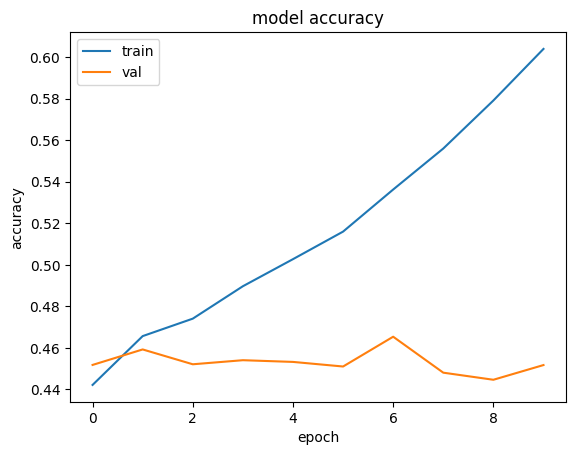

In [12]:
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

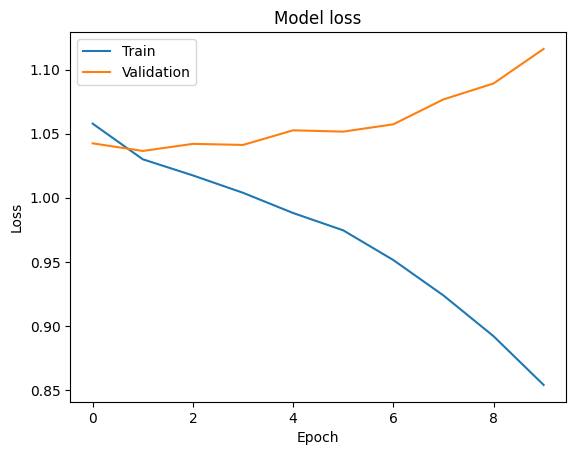

In [13]:
# Plot training & validation loss values
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis = 1)

# Create a classification report using scikit-learn's classification_report function
target_names = ['2', '3', '4'] # replace with your own class names
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

 51/495 [==>...........................] - ETA: 0s

2023-03-26 10:33:45.006422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


495/495 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           2       0.46      0.59      0.52      5203
           3       0.41      0.30      0.35      5348
           4       0.47      0.46      0.47      5277

    accuracy                           0.45     15828
   macro avg       0.45      0.45      0.45     15828
weighted avg       0.45      0.45      0.44     15828

